<a href="https://colab.research.google.com/github/julialromero/regional-representations-graph-model/blob/master/dataset/earth_engine/landsat_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install torchgeo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 2.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 435.6 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.4 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 25.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 569.1/569.1 kB 4.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 31.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 524.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 1.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 4.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 kB 5.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.8/825.8 kB 8.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 3.5 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 426.5 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 551.6/551.6 kB 6.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 1.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.1 MB/s eta 0:00:00:00:01
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=e13463a96c6f093f87fbc64f72c5fec82b5bdbbff91d6457c80435dafcf30d12
  Stored in directory: /home/juro4948/.cache/pip/wheels/48/6a/c2/acb58c7afdf57e4cddf5e1513f5a2d62aa8e98f82a00c76d7c
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.w

In [5]:
#
# ! pip install pyrsgis

In [6]:
# ! pip install git+https://github.com/jgrss/geowombat

In [1]:
import os
import ee
import geemap
import matplotlib.pyplot as plt
import geopandas

import torch
import torchgeo
from torch.utils.data import DataLoader
from torchgeo.datasets import RasterDataset, stack_samples, unbind_samples
from torchgeo.datasets.utils import download_url
from torchgeo.samplers import RandomGeoSampler

In [2]:
# dir_path = 'download_test/test.tif'
# class Landsat8(RasterDataset):
#     filename_glob = "T*_B02_10m.tif"
#     filename_regex = r"^.{6}_(?P<date>\d{8}T\d{6})_(?P<band>B0[\d])"
#     date_format = "%Y%m%dT%H%M%S"
#     is_image = True
#     separate_files = True
#     all_bands = ["B02", "B03", "B04", "B08"]
#     rgb_bands = ["B04", "B03", "B02"]

#     #     all_bands = [
#         "SR_B1",
#         "SR_B2",
#         "SR_B3",
#         "SR_B4",
#         "SR_B5",
#         "SR_B6",
#         "SR_B7",
#         "SR_B8",
#         "SR_B9",
#         "SR_B10",
#         "SR_B11",
#     ]
#     rgb_bands = ["SR_B4", "SR_B3", "SR_B2"]

#     def plot(self, sample):
#         # Find the correct band index order
#         rgb_indices = []
#         for band in self.rgb_bands:
#             rgb_indices.append(self.all_bands.index(band))

#         # Reorder and rescale the image
#         image = sample["image"][rgb_indices].permute(1, 2, 0)
#         image = torch.clamp(image / 10000, min=0, max=1).numpy()

#         # Plot the image
#         fig, ax = plt.subplots()
#         ax.imshow(image)

#         return fig

In [3]:
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader
from torch import nn
import torch.optim as optim
import PIL
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import imageio
import numpy.ma as ma

In [4]:
# import geowombat as gw

# fig, ax = plt.subplots(dpi=200)
# with gw.open('/content/drive/MyDrive/landsat/download_landsat_images/09013535101/LC08_013031_20200222.tif') as src:
#     src.where(src != 0).sel(band=[1]).gw.imshow(robust=True, ax=ax)
# plt.tight_layout(pad=1)

In [5]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),   #must same as here
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(), # data augmentation
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # normalization
])

In [6]:
image_dir= 'download_landsat_images/'
image_folders = os.listdir(image_dir)

(24, 29, 17)
(45, 28, 17)
(29, 22, 17)
(119, 76, 17)
(44, 47, 17)
(42, 19, 17)
(77, 48, 17)
(57, 45, 17)
(41, 33, 17)
(98, 79, 17)


/tmp/ipykernel_106574/564687340.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(f'{image_dir}{path}/least_cloudy_clipped.tif')


Text(0.5, 0.98, 'Band 2 (blue)')

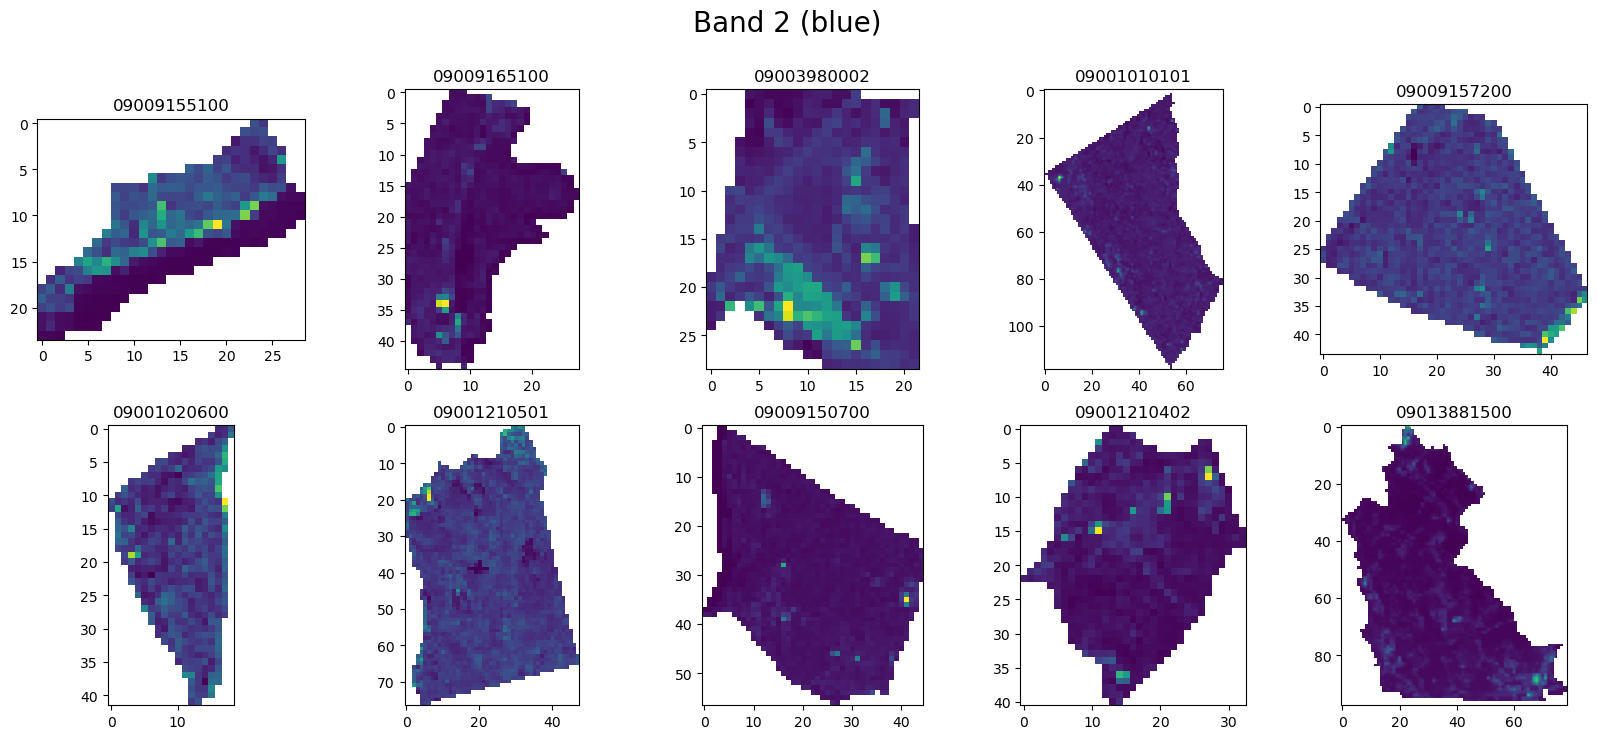

In [7]:
fig, axs = plt.subplots(2, 5, figsize=(20,8))
for path, ax in zip(image_folders[0:10], axs.flatten()):
    img = imageio.imread(f'{image_dir}{path}/least_cloudy_clipped.tif')

    B2_blue = img[:,:,1]
#     B3_green = img[:,:,2]
#     B4_red = img[:,:,3]

    print(img.shape)
    ax.imshow(B2_blue)
    ax.set_title(path)
plt.suptitle('Band 2 (blue)', fontsize=(20))

In [9]:
import tqdm

dirr= 'download_landsat_images/'
batch = torch.empty(1, 3, 224, 224)
for img_dir in tqdm.tqdm(os.listdir(dirr)):
    try:
        dirpath = dirr + img_dir
        path = 'least_cloudy_clipped.tif'#os.listdir(dirpath)[0]
        img = np.array(imageio.imread(dirr + img_dir + '/' + path))

        B2_blue = img[:,:,1]
        B3_green = img[:,:,2]
        B4_red = img[:,:,3]

        rgb = np.stack([B4_red, B3_green, B2_blue], axis=0)

        rgb[rgb == -np.inf] = 0
        out = transform(torch.tensor(rgb))
        out = torch.unsqueeze(out, 0)



        batch = torch.cat((batch, out), 0)
        
    except Exception as e:
#     if len(os.listdir(dirr + img_dir)) == 0:
#       pass
        if '.ipynb_checkpoints' in dirpath:
            pass
        else:
            print(e)
            print('error')


  0%|                                                                                                                                  | 0/8233 [00:00<?, ?it/s]/tmp/ipykernel_106574/3640276747.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = np.array(imageio.imread(dirr + img_dir + '/' + path))
  2%|█▉                                                                                                                      | 133/8233 [00:05<06:23, 21.13it/s]

No such file: '/home/juro4948/region_representation_learning/regional-representations-graph-model/dataset/earth_engine/download_landsat_images/test1/least_cloudy_clipped.tif'
error


 42%|█████████████████████████████████████████████████▍                                                                     | 3422/8233 [11:27<28:25,  2.82it/s]

No such file: '/home/juro4948/region_representation_learning/regional-representations-graph-model/dataset/earth_engine/download_landsat_images/36071015203/least_cloudy_clipped.tif'
error
No such file: '/home/juro4948/region_representation_learning/regional-representations-graph-model/dataset/earth_engine/download_landsat_images/36071015009/least_cloudy_clipped.tif'
error
No such file: '/home/juro4948/region_representation_learning/regional-representations-graph-model/dataset/earth_engine/download_landsat_images/36071015007/least_cloudy_clipped.tif'
error
No such file: '/home/juro4948/region_representation_learning/regional-representations-graph-model/dataset/earth_engine/download_landsat_images/36071010602/least_cloudy_clipped.tif'
error
No such file: '/home/juro4948/region_representation_learning/regional-representations-graph-model/dataset/earth_engine/download_landsat_images/36071013301/least_cloudy_clipped.tif'
error
No such file: '/home/juro4948/region_representation_learning/regi

 72%|█████████████████████████████████████████████████████████████████████████████████████▊                                 | 5933/8233 [31:51<24:58,  1.53it/s]

No such file: '/home/juro4948/region_representation_learning/regional-representations-graph-model/dataset/earth_engine/download_landsat_images/36009940301/least_cloudy_clipped.tif'
error
No such file: '/home/juro4948/region_representation_learning/regional-representations-graph-model/dataset/earth_engine/download_landsat_images/36009940302/least_cloudy_clipped.tif'
error
No such file: '/home/juro4948/region_representation_learning/regional-representations-graph-model/dataset/earth_engine/download_landsat_images/36009961301/least_cloudy_clipped.tif'
error
No such file: '/home/juro4948/region_representation_learning/regional-representations-graph-model/dataset/earth_engine/download_landsat_images/36009961302/least_cloudy_clipped.tif'
error
No such file: '/home/juro4948/region_representation_learning/regional-representations-graph-model/dataset/earth_engine/download_landsat_images/36001000502/least_cloudy_clipped.tif'
error
No such file: '/home/juro4948/region_representation_learning/regi

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8233/8233 [1:02:09<00:00,  2.21it/s]


In [10]:
batch.shape

torch.Size([8192, 3, 224, 224])

In [17]:
# z = ma.masked_values(rgb, -np.inf)

In [ ]:
# class LandsatDataset(Dataset):

#     def __init__(self, root, image_dir, csv_file, transform=None):
#         self.root = root
#         self.image_dir = image_dir
#         self.image_folders= os.listdir(image_dir)
#         self.geoid_idx_df = pd.read_csv(csv_file)
#         self.transform = transform

#     def __len__(self):
#         return len(self.geoid_idx_df)

#     def __getitem__(self, index):
#         image_folder = os.path.join(self.image_dir, self.image_files[index]) 
#         image_name = os.path.join(image_folder, 'median.tif')




#         image = PIL.Image.open(image_name)
#         label = self.data[index]
#         if self.transform:
#             image = self.transform(image)
#         return (image, label)

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [15]:
device = 'cpu'

In [147]:
from torchvision.models import resnet18, ResNet18_Weights

class ResNetPredictor(nn.Module):

    def __init__(self):
        super().__init__()
        weights = ResNet18_Weights.DEFAULT
        model = resnet18(weights=weights, progress=False)
        num_features = model.fc.in_features 
        model.fc = nn.Linear(num_features, 200)
        self.resnet18 = model.eval()
        
        self.transforms = weights.transforms()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        with torch.no_grad():
            x = self.transforms(x)
            y_pred = self.resnet18(x)
            return y_pred

In [135]:
minibatch = torch.nan_to_num(batch[0:100], 0)
minibatch.shape

torch.Size([100, 3, 224, 224])

In [140]:
predictor = Predictor().to(device)


In [151]:
out = torch.empty((1,200))
for i in range (0, batch.shape[0], 500):
    res = predictor(minibatch)
    out = torch.cat((out, res))

# Below we will qualitatively check embeddings